In [1]:
import os
from os import path
import numpy as np
import nibabel as nib
from tqdm import tqdm
from torch.utils.data import Dataset
from glob import glob
import random
import torch
import torchio as tio
import matplotlib.pyplot as plt
from dataset_tio import *
import torchvision
from generator import GeneratorRRDB
from trainer_org import LitTrainer as LitTrainer_org
from trainer_gan import LitTrainer as LitTrainer_gan
# from trainer_tune import LitTrainer as LitTrainer_tune
import pytorch_lightning as pl
from discriminator import Discriminator
from feature_extractor import FeatureExtractor

print(os.getcwd())

/mnt/beta/djboonstoppel/Code


In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
img_sim = ImagePair(number=100206, simulated=True, select_slices=70)
print(img_sim)
# gen_hr = subject['SR'].numpy()[0]
# gen_hr_nifty = nib.Nifti1Image(gen_hr, affine=img.subject()['HR'].affine, header=img.info()['HR'])
# nib.save(gen_hr_nifty, 'test.nii.gz')

In [35]:
path = 'output/alpha_content'
fname = '100206-000_HR'

img_hr = nib.load(os.path.join(path, fname+'.nii.gz'))

img_np_hr = img_hr.get_fdata()
max_val = np.percentile(img_np_hr,95)
img_np_hr = img_np_hr / max_val
print(img_np_hr.max())

1.1657713106588872


In [71]:
path = 'output/alpha_content'
fname = '100206-500_SR'
# fname = '100206-000_LR'

img_sr = nib.load(os.path.join(path, fname+'.nii.gz'))

img_np_sr = img_sr.get_fdata()
max_val = np.percentile(img_np_sr,95)
img_np_sr = img_np_sr / max_val
print(img_np_sr.max())

1.2078254987606671


2537.1441255705554
0.26451991098661276
-0.3057730011086769


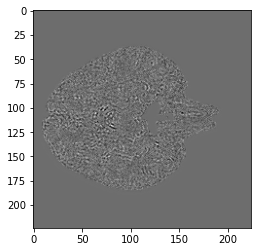

In [72]:
diff = img_np_sr-img_np_hr
plt.imshow(diff[:,:,25], cmap='gray')
diff_sum = np.sum(diff)
print(diff_sum)
print(diff.max())
print(diff.min())